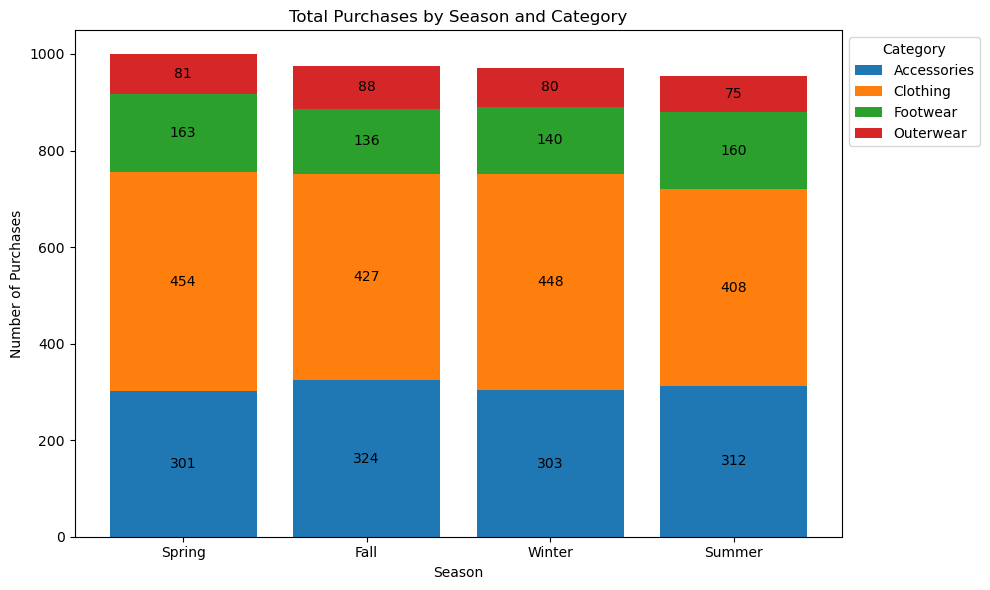

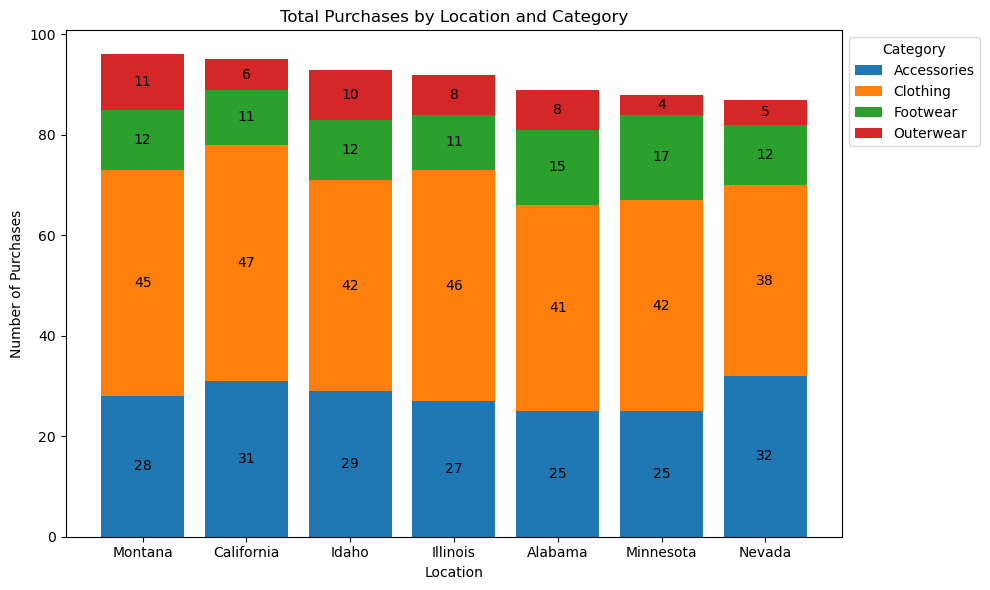

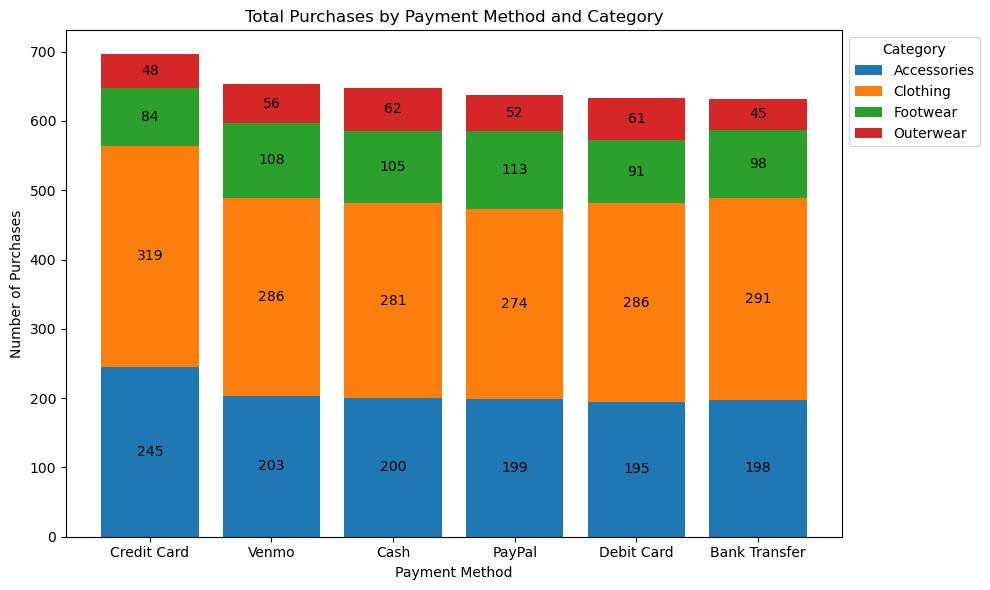

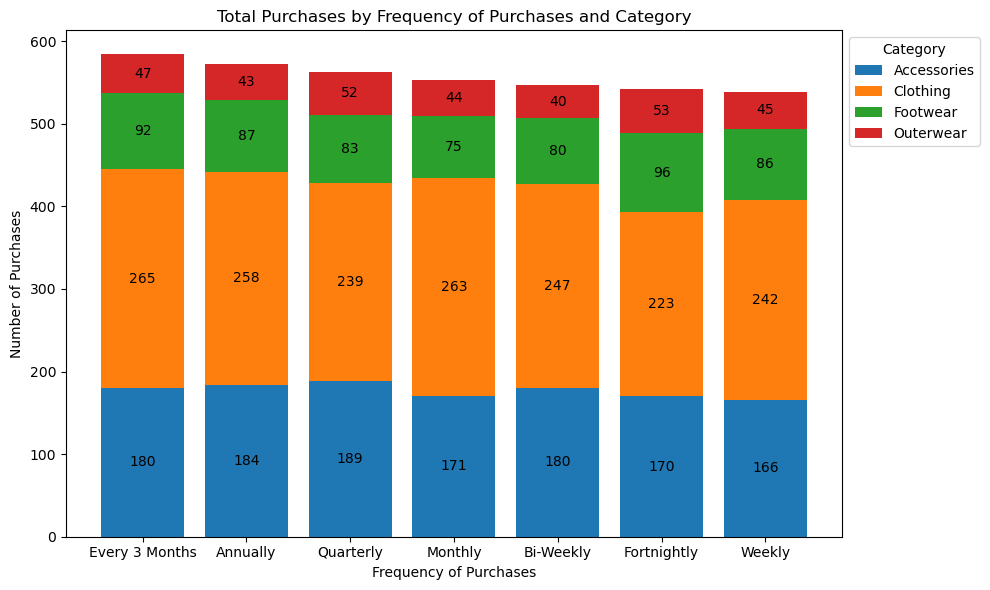

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("shopping_trends.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping for Nonconditional Data
target_col = [
    { 'count_col' : 'Season', 'group_col' : 'Category' },
    { 'count_col' : 'Location', 'group_col' : 'Category' },
    { 'count_col' : 'Payment Method', 'group_col' : 'Category' },
    { 'count_col' : 'Frequency of Purchases', 'group_col' : 'Category' }
]

for dt in target_col:
    count_col = dt['count_col']
    group_col = dt['group_col']
    
    # Dataset
    context_group_counts = df.groupby([count_col, group_col]).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index=count_col, columns=group_col, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Customizing the plot
    ax.set_title(f'Total Purchases by {count_col} and {group_col}')
    ax.set_xlabel(count_col)
    ax.set_ylabel('Number of Purchases')
    ax.legend(title=group_col, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("\n")

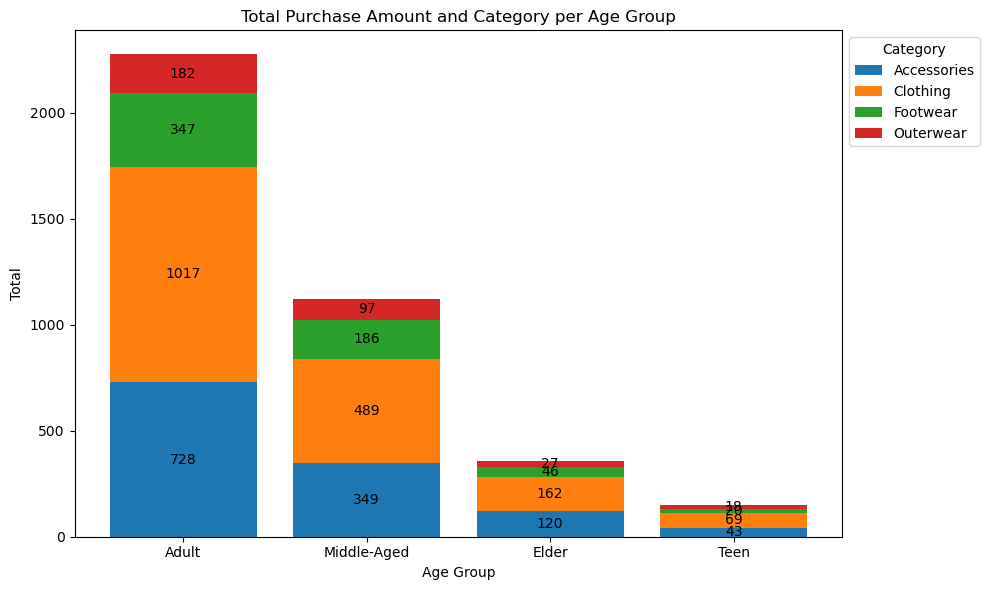

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("shopping_trends.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping
# Dataset
df['Age Group'] = pd.cut(
    df['Age'], 
    bins=[0, 19, 50, 65, 100], 
    labels=['Teen', 'Adult', 'Middle-Aged', 'Elder']
)
context_group_counts = df.groupby(['Age Group', 'Category'], observed=False).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='Age Group', columns='Category', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each group_col as stack
for group_col_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
    bottom += counts[:, group_col_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total Purchase Amount and Category per Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total')
ax.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()